In [137]:

import pickle
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from projection_utils import *
from tqdm import tqdm
import pandas as pd
import math

In [138]:
points = np.load('/home/yucheng/storage/data/test_parking_lot_01/points/0022.npy')
img_path = '/home/yucheng/storage/data/test_parking_lot_01/img_detection/0022.png'
img = np.asanyarray(Image.open(img_path).resize((1920, 1080)))

In [139]:
points[:, 0] = - points[:, 0]

In [140]:
df_describe = pd.DataFrame(points)
df_describe.describe()

,0,1,2,3
count,65536.000000,65536.000000,65536.000000,65536.0
mean,-1.250747,-0.467293,0.350809,0.0
std,14.149654,11.670496,2.214853,0.0
min,-134.674133,-93.971352,-1.106793,0.0
25%,-1.551645,-2.234380,-0.739356,0.0
50%,0.000000,-0.000000,0.000000,0.0
75%,1.559430,1.836605,0.000000,0.0
max,101.375092,61.951927,25.728962,0.0


In [141]:
lidar_image = lidar2CameraOurs(points[:, [1, 2, 0]])[:,[1,0]]

/home/yucheng/workspace/WCSNG/point_vis/projection/projection_utils.py:12: RuntimeWarning: invalid value encountered in double_scalars
  x = point[0] / point[2]
/home/yucheng/workspace/WCSNG/point_vis/projection/projection_utils.py:13: RuntimeWarning: invalid value encountered in double_scalars
  y = point[1] / point[2]


In [142]:
img.shape

(1080, 1920, 3)

In [143]:
lidar_image

array([[         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       ...,
       [917.14475133, 925.77928756],
       [932.07983899, 977.92758518],
       [         nan,          nan]])

100%|██████████| 65536/65536 [00:00<00:00, 402202.28it/s]


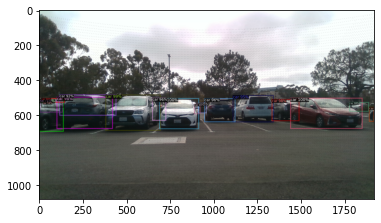

In [144]:
radius = 3
for i in tqdm(range(lidar_image.shape[0])):
    if not math.isnan(lidar_image[i][0]) and not math.isnan(lidar_image[i][1]):
        x = int(lidar_image[i][0])
        y = int(lidar_image[i][1])
        if x >= 0 and x < img.shape[0] and\
           y >= 0 and y < img.shape[1]:
            img[x, y, :] = 256
plt.imsave('img.png', img)
plt.imshow(img)